# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

     pcost       dcost       gap    pres   dres
 0:  1.7890e+00  3.9171e+01  1e+02  2e+00  3e+01
 1:  1.4170e+01  1.4208e+01  4e+01  6e-01  8e+00
 2:  2.2524e+01  2.5627e+01  4e+01  5e-01  7e+00
 3:  4.8660e+01  5.0039e+01  1e+01  1e-01  2e+00
 4:  5.7717e+01  5.7639e+01  8e-01  6e-03  8e-02
 5:  5.8215e+01  5.8178e+01  9e-02  4e-04  6e-03
 6:  5.8237e+01  5.8237e+01  1e-03  4e-06  5e-05
 7:  5.8237e+01  5.8237e+01  1e-05  4e-08  5e-07
 8:  5.8237e+01  5.8237e+01  1e-07  4e-10  5e-09
Optimal solution found.


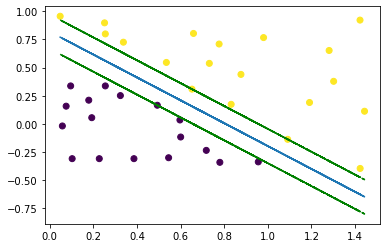

In [2]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]
Y = y.reshape((-1,1))
plt.scatter(x[:,0],x[:,1],c = y)

b = np.ones((len(x),1))
x_dash = np.column_stack((x,b))
Q = matrix([[1,0,0],[0,1,0],[0,0,1]])*1.
p = matrix(np.zeros(len(x_dash[0])))
h = -matrix(np.ones((len(x),1)))
G = -matrix(Y*x_dash)*1.
solver = solvers.qp(Q,p,G,h)
w = np.array(solver['x'])
w1 = w[0]
w2 = w[1]
b = w[2]


plt.plot(x[:,0],((-w1*x[:,0])-b)/w2)
plt.plot(x[:,0],((-w1*x[:,0])-b+1)/w2,'--', c = 'g')
plt.plot(x[:,0],((-w1*x[:,0])-b-1)/w2,'--', c = 'g')
# print(w)

## b) and c) : Linearly Non-separable Dataset

(114, 114)
     pcost       dcost       gap    pres   dres
 0:  1.2418e+00  3.9717e+01  6e+02  2e+00  7e+02
 1:  1.0376e+01 -1.5710e+01  3e+01  7e-02  2e+01
 2:  6.1726e+00  1.9674e-01  6e+00  1e-02  3e+00
 3:  2.6757e+00  1.9485e+00  7e-01  1e-03  3e-01
 4:  2.4029e+00  2.1622e+00  2e-01  3e-04  8e-02
 5:  2.3265e+00  2.2274e+00  1e-01  9e-05  3e-02
 6:  2.2888e+00  2.2613e+00  3e-02  2e-05  6e-03
 7:  2.2755e+00  2.2726e+00  3e-03  4e-16  5e-14
 8:  2.2740e+00  2.2739e+00  7e-05  4e-16  3e-14
 9:  2.2739e+00  2.2739e+00  7e-07  4e-16  2e-14
Optimal solution found.


(-10.5766, 9.7007)

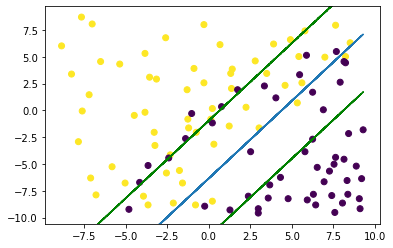

In [3]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]
Y = y.reshape((-1,1))
C = 0.05
plt.scatter(x[:,0],x[:,1],c = y)
b = np.ones((len(x),1))
x_dash = np.column_stack((x,b))

# Q = matrix(np.eye(len(x_dash)+3))
Q = matrix(np.zeros((len(x_dash)+3,len(x_dash)+3)))
Q[0,0] = 1
Q[1,1] = 1

print(np.shape(Q))
p_a = np.zeros((1,3))
p_b = np.ones(len(x_dash))*C
p = matrix(np.append(p_a,p_b))


h_a = 1*np.ones(len(x_dash))
h_b = np.zeros(len(x_dash))
h = -matrix(np.append(h_a,h_b))

G_1 = -(Y*x_dash)*1.
G_2 = -(np.eye(len(x_dash)))*1.
G_3 = (np.zeros((len(x_dash),3)))*1.
G = matrix(np.block([[G_1, G_2],[G_3,G_2]]))*1.
# print('G1',np.shape(G_1))
# print('G2',np.shape(G_2))
# print('G3',np.shape(G_3))
# print('Y',np.shape(Y))
# print('X_dash',(x_dash))

solver = solvers.qp(Q,p,G,h)
w = np.array(solver['x'])
w1 = w[0]
w2 = w[1]
b = w[2]

plt.plot(x[:,0],-(w1/w2)*x[:,0]-(b/w2))
plt.plot(x[:,0],-(w1/w2)*x[:,0]-(1+b)/w2,'--', c = 'g')
plt.plot(x[:,0],-(w1/w2)*x[:,0]+(1-b)/w2,'--', c = 'g')
plt.xlim((x[:, 0].min()-1, x[:, 0].max()+1))
plt.ylim((x[:, 1].min()-1, x[:, 1].max()+1))

# Part c #

     pcost       dcost       gap    pres   dres
 0:  2.0644e+00  5.0524e+01  7e+02  3e+00  6e+02
 1:  1.9690e+01 -2.3059e+01  5e+01  1e-01  3e+01
 2:  1.1116e+01  1.1465e+00  1e+01  2e-02  4e+00
 3:  5.1661e+00  3.9158e+00  1e+00  2e-03  5e-01
 4:  4.6987e+00  4.3010e+00  4e-01  5e-04  1e-01
 5:  4.5752e+00  4.4251e+00  2e-01  1e-04  3e-02
 6:  4.5227e+00  4.4685e+00  5e-02  3e-05  7e-03
 7:  4.5033e+00  4.4844e+00  2e-02  9e-06  2e-03
 8:  4.4945e+00  4.4920e+00  3e-03  7e-07  2e-04
 9:  4.4932e+00  4.4931e+00  3e-05  8e-09  2e-06
10:  4.4931e+00  4.4931e+00  3e-07  8e-11  2e-08
Optimal solution found.


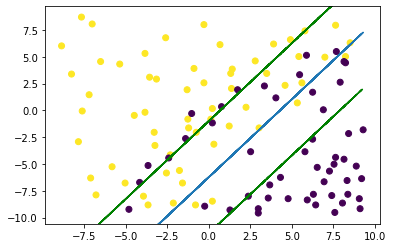

     pcost       dcost       gap    pres   dres
 0: -5.3430e+01  2.5866e+02  1e+03  4e+00  7e+01
 1:  1.3083e+02 -3.0700e+01  2e+02  5e-01  8e+00
 2:  5.6266e+01  3.4536e+01  2e+01  3e-02  5e-01
 3:  4.9781e+01  4.0113e+01  1e+01  1e-02  2e-01
 4:  4.6228e+01  4.2703e+01  4e+00  4e-03  6e-02
 5:  4.5200e+01  4.3715e+01  2e+00  1e-03  2e-02
 6:  4.4871e+01  4.3992e+01  9e-01  4e-04  6e-03
 7:  4.4528e+01  4.4306e+01  2e-01  8e-05  1e-03
 8:  4.4480e+01  4.4339e+01  1e-01  4e-05  7e-04
 9:  4.4429e+01  4.4388e+01  4e-02  4e-16  8e-14
10:  4.4408e+01  4.4407e+01  8e-04  4e-16  2e-13
11:  4.4407e+01  4.4407e+01  8e-06  4e-16  2e-13
Optimal solution found.


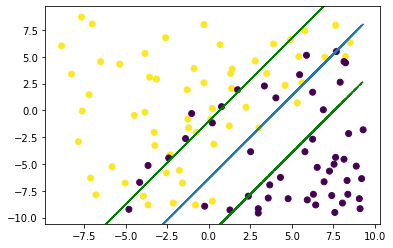

     pcost       dcost       gap    pres   dres
 0: -8.1935e+05  4.6922e+05  2e+06  2e+02  2e+01
 1:  1.4977e+05 -5.9743e+03  2e+05  4e+00  3e-01
 2:  8.0014e+03  2.6761e+03  6e+03  1e-01  8e-03
 3:  5.3250e+03  3.5779e+03  2e+03  3e-02  2e-03
 4:  5.1725e+03  3.8285e+03  1e+03  2e-02  1e-03
 5:  4.7825e+03  4.0969e+03  7e+02  8e-03  6e-04
 6:  4.6499e+03  4.2525e+03  4e+02  4e-03  3e-04
 7:  4.4915e+03  4.3960e+03  1e+02  1e-04  1e-05
 8:  4.4683e+03  4.4074e+03  6e+01  5e-05  4e-06
 9:  4.4356e+03  4.4342e+03  1e+00  8e-07  6e-08
10:  4.4348e+03  4.4348e+03  6e-02  3e-08  3e-09
11:  4.4348e+03  4.4348e+03  1e-03  6e-10  5e-11
Optimal solution found.


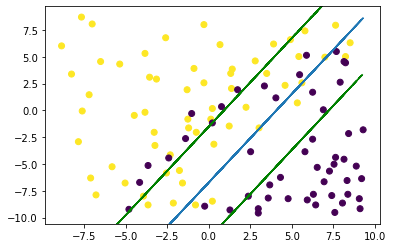

     pcost       dcost       gap    pres   dres
 0: -8.2223e+13  4.5071e+13  2e+14  2e+06  2e+01
 1:  1.4294e+13 -6.7821e+11  2e+13  3e+04  2e-01
 2:  2.5270e+11 -1.8156e+08  3e+11  4e+02  3e-03
 3:  2.5980e+09  2.6019e+07  3e+09  4e+00  3e-05
 4:  9.5287e+07  2.6381e+07  8e+07  1e-01  8e-07
 5:  5.5354e+07  3.4041e+07  2e+07  3e-02  2e-07
 6:  5.2265e+07  3.7746e+07  2e+07  2e-02  1e-07
 7:  4.8992e+07  4.0548e+07  9e+06  6e-03  5e-08
 8:  4.6404e+07  4.2701e+07  4e+06  2e-03  2e-08
 9:  4.4997e+07  4.3915e+07  1e+06  9e-05  7e-10
10:  4.4776e+07  4.4016e+07  8e+05  4e-05  3e-10
11:  4.4418e+07  4.4290e+07  1e+05  6e-06  5e-11
12:  4.4349e+07  4.4346e+07  3e+03  1e-07  1e-12
13:  4.4347e+07  4.4347e+07  2e+02  8e-09  2e-12
14:  4.4347e+07  4.4347e+07  2e+00  8e-11  4e-13
Optimal solution found.


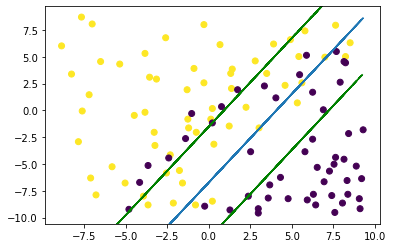

In [4]:
C = 0.1
plt.scatter(x[:,0],x[:,1],c = y)

p_a = np.zeros((1,3))
p_b = np.ones(len(x_dash))*C
p = matrix(np.append(p_a,p_b))

solver = solvers.qp(Q,p,G,h)
w = np.array(solver['x'])
w1 = w[0]
w2 = w[1]
b = w[2]

plt.plot(x[:,0],-(w1/w2)*x[:,0]-(b/w2))
plt.plot(x[:,0],-(w1/w2)*x[:,0]-(1+b)/w2,'--', c = 'g')
plt.plot(x[:,0],-(w1/w2)*x[:,0]+(1-b)/w2,'--', c = 'g')
plt.xlim((x[:, 0].min()-1, x[:, 0].max()+1))
plt.ylim((x[:, 1].min()-1, x[:, 1].max()+1))
plt.show()
C = 1
plt.scatter(x[:,0],x[:,1],c = y)

p_a = np.zeros((1,3))
p_b = np.ones(len(x_dash))*C
p = matrix(np.append(p_a,p_b))

solver = solvers.qp(Q,p,G,h)
w = np.array(solver['x'])
w1 = w[0]
w2 = w[1]
b = w[2]

plt.plot(x[:,0],-(w1/w2)*x[:,0]-(b/w2))
plt.plot(x[:,0],-(w1/w2)*x[:,0]-(1+b)/w2,'--', c = 'g')
plt.plot(x[:,0],-(w1/w2)*x[:,0]+(1-b)/w2,'--', c = 'g')
plt.xlim((x[:, 0].min()-1, x[:, 0].max()+1))
plt.ylim((x[:, 1].min()-1, x[:, 1].max()+1))
plt.show()

C = 100
plt.scatter(x[:,0],x[:,1],c = y)

p_a = np.zeros((1,3))
p_b = np.ones(len(x_dash))*C
p = matrix(np.append(p_a,p_b))

solver = solvers.qp(Q,p,G,h)
w = np.array(solver['x'])
w1 = w[0]
w2 = w[1]
b = w[2]

plt.plot(x[:,0],-(w1/w2)*x[:,0]-(b/w2))
plt.plot(x[:,0],-(w1/w2)*x[:,0]-(1+b)/w2,'--', c = 'g')
plt.plot(x[:,0],-(w1/w2)*x[:,0]+(1-b)/w2,'--', c = 'g')
plt.xlim((x[:, 0].min()-1, x[:, 0].max()+1))
plt.ylim((x[:, 1].min()-1, x[:, 1].max()+1))
plt.show()

C = 1000000
plt.scatter(x[:,0],x[:,1],c = y)

p_a = np.zeros((1,3))
p_b = np.ones(len(x_dash))*C
p = matrix(np.append(p_a,p_b))

solver = solvers.qp(Q,p,G,h)
w = np.array(solver['x'])
w1 = w[0]
w2 = w[1]
b = w[2]

plt.plot(x[:,0],-(w1/w2)*x[:,0]-(b/w2))
plt.plot(x[:,0],-(w1/w2)*x[:,0]-(1+b)/w2,'--', c = 'g')
plt.plot(x[:,0],-(w1/w2)*x[:,0]+(1-b)/w2,'--', c = 'g')
plt.xlim((x[:, 0].min()-1, x[:, 0].max()+1))
plt.ylim((x[:, 1].min()-1, x[:, 1].max()+1))
plt.show()


### Explain your observations here:

The decision boundary moves slightly even when large C values are passed. As a result, there is a negligible difference in the plot behaviour due to C